## Library

In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import os
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Model Params

In [3]:
new_lr_Object = LogisticRegression(penalty='l2', dual=False,
                               tol=0.0001, C=1.0,
                               fit_intercept=True,
                               intercept_scaling=1,
                               class_weight=None,
                               random_state=None,
                               solver='lbfgs',
                               max_iter=100,
                               multi_class='auto',
                              verbose=0, warm_start=False,
                              n_jobs=None, l1_ratio=None)

In [4]:
new_lr_Object.C = 0.2
new_lr_Object.solver = 'liblinear'
new_lr_Object.max_iter= 500
new_lr_Object

LogisticRegression(C=0.2, max_iter=500, multi_class='auto', solver='liblinear')

## Dataset

In [5]:
df = pd.read_csv(os.getcwd() + '/dataset/clean_creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class_Category,Stan_Amount
0,129429.0,2.001330,-0.139406,-1.083547,0.369438,-0.111487,-0.926088,0.119385,-0.199441,0.328092,...,-0.189206,-0.422800,0.278910,0.090378,-0.241277,0.250611,-0.078495,-0.071672,0,-0.316307
1,62623.0,0.877614,-0.223856,0.245040,1.196033,-0.268269,-0.047874,0.105886,0.074215,-0.224865,...,0.229051,0.369881,-0.210474,0.016485,0.504265,-0.281459,0.001636,0.031745,0,0.219986
2,123063.0,2.286054,-1.420289,-0.981634,-1.781827,-0.979863,0.029657,-1.315848,0.009382,-1.368419,...,-0.140304,0.070951,0.221316,0.264995,-0.196395,-0.204423,0.013638,-0.053855,0,-0.294881
3,82071.0,-1.167613,0.970922,0.910760,1.300844,-0.374753,0.570518,0.563131,0.461055,-0.756205,...,0.099360,0.422407,0.009802,0.058935,-0.136536,-0.274997,-0.138153,0.051688,0,0.089289
4,167656.0,2.113740,0.220656,-1.909172,0.279489,0.775963,-0.543995,0.246733,-0.262458,0.369504,...,-0.388017,-0.957565,0.259458,0.019217,-0.149343,0.201827,-0.056467,-0.033643,0,-0.342486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,1.194271
878,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1,-0.347318
879,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,-0.041844
880,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,0.619997


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Class_Category', 'Stan_Amount'],
      dtype='object')

## Model Fitting

In [7]:
X = df.drop('Class_Category', axis=1)[0:700].values
y = df['Class_Category'][0:700].values

In [8]:
new_lr_Object.fit(X, y)

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.2, max_iter=500, multi_class='auto', solver='liblinear')

## Model Predicting

In [9]:
new_X = df.drop('Class_Category', axis=1)[700:715].values
y_pred = new_lr_Object.predict(new_X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
y_test= df['Class_Category'][700:715].values
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Model Eval

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


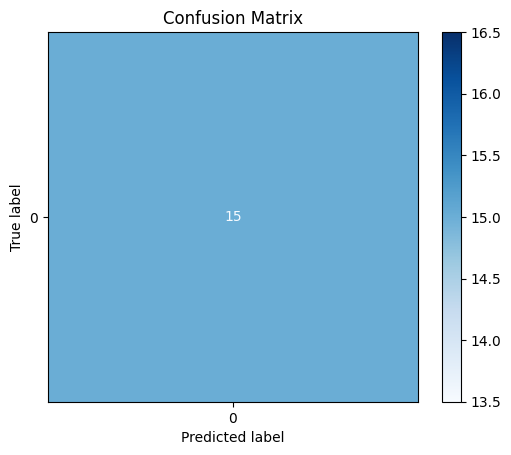

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues) 
plt.title('Confusion Matrix')
plt.show()

In [12]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

